## 생기부 정보 입력

### 키워드 분석용 입력

In [112]:
# ==============================================================================
# 내 생기부 txt 파일 입력하기
# ==============================================================================
target_file_path = '202410821_2_컴퓨터과학전공_권서윤_정시_censored.txt'

### 석차등급 분석용 입력

In [113]:
# ==============================================================================
# 내 성적 입력하기
# 여기 아래에 본인의 등급을 직접 수정해서 넣으세요.
# 수학 및 탐구가 여러 과목인 경우, 평균으로 입력해주세요!
# (과목이 없는 경우는, None 입력 또는 비워두기)
# ==============================================================================
my_grades_data = {
    '1-1': {'국어': 3.0, '수학': 3.5, '영어': 2.0, '과학': 3.0, '사회': 3.0},
    '1-2': {'국어': 2.8, '수학': 3.0, '영어': 2.5, '과학': 2.8, '사회': 2.5},
    '2-1': {'국어': 2.5, '수학': 2.5, '영어': 2.0, '과학': 2.5, '사회': 2.0},
    '2-2': {'국어': 2.0, '수학': 2.0, '영어': 1.8, '과학': 2.0, '사회': 1.5},
    '3-1': {'국어': 1.8, '수학': 1.5, '영어': 1.5, '과학': 1.5, '사회': 1.0},
    '3-2': {'국어': None, '수학': None, '영어': None, '과학': None, '사회': None} 
}

### 문장 수 분석용 입력

In [114]:
# ==============================================================================
# 세부 특기사항의 전체 문장 수를 입력해주세요!
# ==============================================================================
my_lines = 100

### 실행 전 라이브러리 준비

#### 코드를 실행 전 라이브러리 설치 (한국어 형태소 분석 라이브러리인 KoNLPy)

#### import...

In [115]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
import platform
from konlpy.tag import Okt
from collections import Counter
from matplotlib.lines import Line2D
import seaborn as sns

## 생기부 키워드 분석

### 입력 생기부와 합격자 파일의 top 20 키워드 비교

📂 집단 파일 분석 중... (총 20개)
📄 단일 파일 분석 중... (202410821_2_컴퓨터과학전공_권서윤_정시_censored.txt)

     [입력 생기부 Top 20]       |       [합격 집단 Top 20]      
 1. 실험           | 인공
 2. 한국           | 지능
 3. 창의           | 실험
 4. 일본어         | 프로
 5. 가짐           | 데이터
 6. 토대           | 자료
 7. 연구           | 게임
 8. 평가           | 컴퓨터
 9. 배경           | 프로그램
10. 감상문         | 개발
11. 일본           | 지식
12. 작문           | 창의
13. 게임           | 스스로
14. 지식           | 구조
15. 차이점         | 매우
16. 법칙           | 직접
17. 효과           | 함수
18. 직접           | 코드
19. 형성           | 모델
20. 생명과학       | 주도


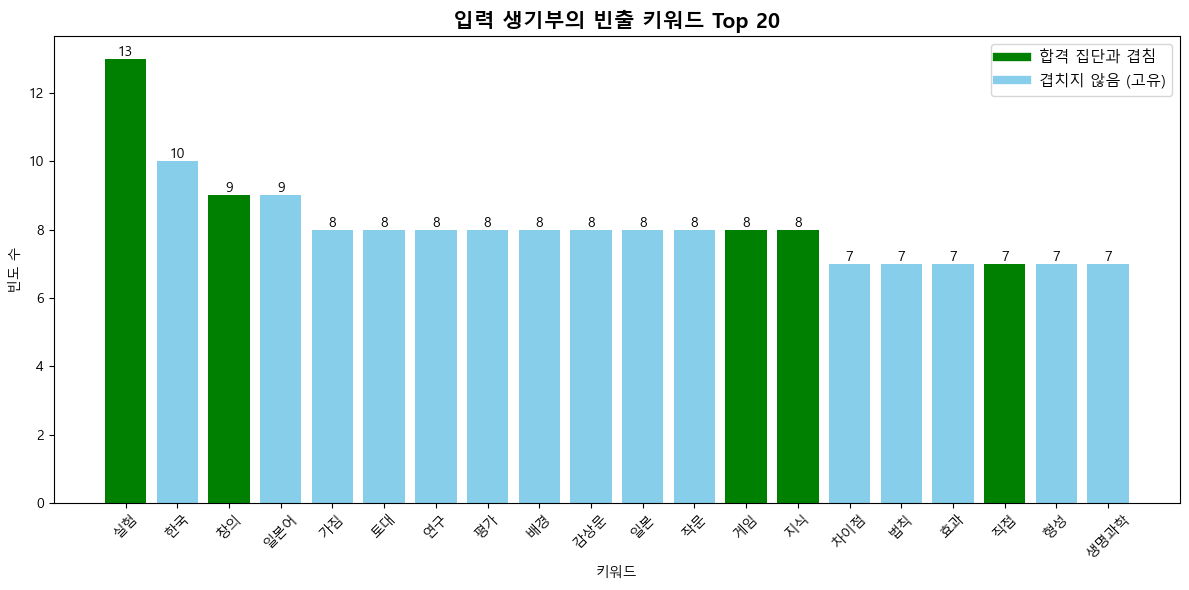

In [116]:
# 1. 설정 (파일 경로 및 폰트)
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 비교군 입력
group_folder_path = '수시_컴과_학종_및_교과_txt/*.txt'       # 집단 폴더

# -------------------------------------------------------------
# 2. 공통 함수: 전처리, 명사 추출, 한글 정렬
# -------------------------------------------------------------
okt = Okt()

stop_words = [
    '국어', '영어', '수학', '사회', '과학', '한문', '한국사', '기술', '가정', '체육', '정보', '미술', '음악', '교양', '외국어', '언어', '예술', '역사', '도덕', '자율', '심화', '물리학', '화학', '문학', '통계', '확률', 
    '활동', '학생', '내용', '통해', '위해', '대한', '과정', '모습', '시간', '부분', 
    '생각', '이해', '학습', '노력', '작성', '결과', '활용', '분석', '자신', '친구', 
    '교사', '수업', '계획', '학교', '학년', '특기', '사항', '정도', '참여', '진행',
    '문제', '해결', '주제', '설명', '탐구', '우리', '가지', '관련', '적극', '발표',
    '조사', '제작', '개념', '원리', '제시', '사용', '진선', '성장', '정리', '기록',
    '의견', '보고서', '역할', '수행', '선정', '분야', '경우', '확인', '적용', 
    '또한', '태도', '자세', '관계', '대해', '방법', '과목', '보임', '위고', '읽고',
    '표현', '교과', '진로', '완성', '성취도', '질문', '바탕', '상황', '이수', '이용',
    '다른', '단원', '도움', '특징', '긍정', '단위', '능력', '여자', '고등학교', '구함',
    '관심', '학급', '환경', '소개', '생활', '흥미', '인상', '사람', '위수', '하이', '발전', 
    '변화', '파악', '점수', '이름', '작품', '자기', '선택', '자수', '합계', '미래',
    '평균', '논리', '직업', '및', '등', '수', '것', '포함', '비고', '개인', '사례',
    '코로나', '외국', '정화', '가장', '기사', '특별', '구역', '교실', '교육', '수강',
    '교내', '소독', '과제', '독서', '행동', '화학', '운동', '집중', '물올', '예방',
    '청소', '비교', '학기', '성함', '영향', '상대', '방안', '구성', '방식', '실제',
    '개선', '가치', '이틀', '고민', '특성', '약물', '지적', '체계', '접근', '구체',
    '공감', '여러', '통합', '영역', '사랑', '인간', '보고', '의미', '감상', '체험',
    '모든', '사람', '준비', '향상', '대하', '실천', '인식', '해당', '희망', '발생',
    '경험', '만들기', '항상', '사고', '목표', '기름', '질병', '등급', '정의', '주변', 
    '영상', '표준편차', '지름', '세계', '느낌', '토론', '문화', '문장', '산업'
]

def get_keywords(text):
    text = re.sub(r'\\', '', text)
    text = re.sub(r'--- Page \d+ ---', '', text)
    text = re.sub(r'정부24', '', text)
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', ' ', text)
    nouns = okt.nouns(text)
    return [n for n in nouns if len(n) > 1 and n not in stop_words]

# 한글 줄맞춤을 위한 함수
def pad_text(text, width):
    display_len = 0
    for char in text:
        if ord(char) > 127:
            display_len += 2
        else:
            display_len += 1
    
    padding = width - display_len
    return text + " " * max(0, padding)

# -------------------------------------------------------------
# 3. 데이터 분석
# -------------------------------------------------------------
# 집단 파일 분석
file_list = glob.glob(group_folder_path)
group_nouns = []
print(f"📂 집단 파일 분석 중... (총 {len(file_list)}개)")
for file in file_list:
    try:
        with open(file, 'r', encoding='utf-8') as f:
            group_nouns.extend(get_keywords(f.read()))
    except: pass

group_top20 = [word for word, count in Counter(group_nouns).most_common(20)]

# 단일 파일 분석
print(f"📄 단일 파일 분석 중... ({target_file_path})")
with open(target_file_path, 'r', encoding='utf-8') as f:
    target_nouns = get_keywords(f.read())

target_counter = Counter(target_nouns)
target_top20_items = target_counter.most_common(20)
target_top20_words = [word for word, count in target_top20_items]

# 4. 결과 출력
print("\n" + "="*60)
# 제목 출력
print(f"{' [입력 생기부 Top 20] ':^26} | {' [합격 집단 Top 20] ':^26}")
print("="*60)

for i in range(20):
    w1 = target_top20_words[i] if i < len(target_top20_words) else ""
    w2 = group_top20[i] if i < len(group_top20) else ""
    
    # pad_text 함수를 사용해 한글 너비 14칸으로 고정
    formatted_w1 = pad_text(w1, 14)
    
    print(f"{i+1:>2}. {formatted_w1} | {w2}")
print("="*60)

# 5. 시각화
words = [w for w, c in target_top20_items]
counts = [c for w, c in target_top20_items]
colors = ['green' if w in group_top20 else 'skyblue' for w in words]

plt.figure(figsize=(12, 6))
bar_plot = plt.bar(words, counts, color=colors)

plt.title(f"입력 생기부의 빈출 키워드 Top 20", fontsize=15, fontweight='bold')
plt.xlabel("키워드")
plt.ylabel("빈도 수")
plt.xticks(rotation=45)

# 숫자 표시
for rect in bar_plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

# 범례(Legend) 추가
custom_lines = [
    Line2D([0], [0], color='green', lw=6, label='합격 집단과 겹침'),
    Line2D([0], [0], color='skyblue', lw=6, label='겹치지 않음 (고유)')
]
plt.legend(handles=custom_lines, loc='upper right', fontsize=11, frameon=True)

plt.tight_layout()
plt.show()

## 석차등급 분석

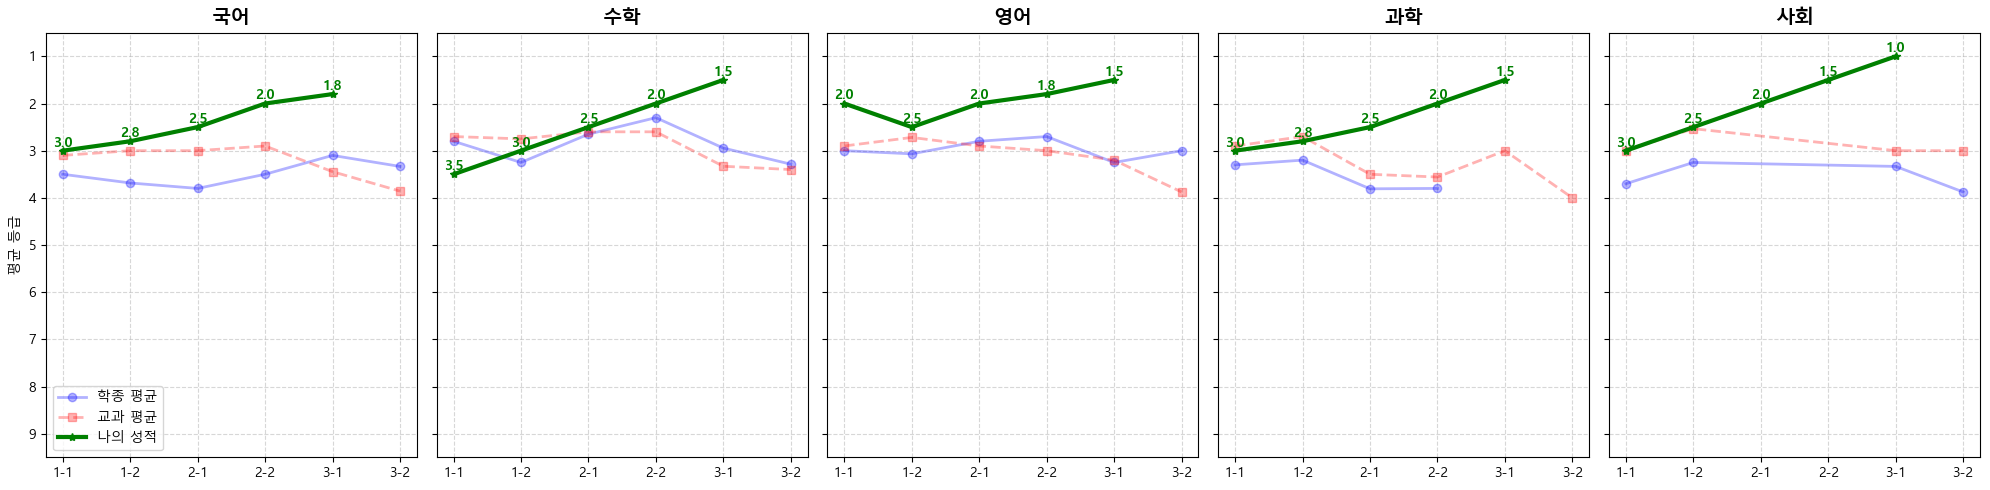

In [117]:
# 1. 한글 폰트 설정
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False 

# 2. 두 파일 불러오기
file_1 = '컴과_학종_석차등급.xlsx'
file_2 = '컴과_교과_석차등급.xlsx'

try:
    df1 = pd.read_excel(file_1)
    df2 = pd.read_excel(file_2)
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 파일 이름과 경로를 확인해주세요.")
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()

# 3. 평균 계산 함수
def calculate_average(df):
    if df.empty: return pd.DataFrame(columns=['과목', '학기', '등급'])
    
    semesters = ['1-1', '1-2', '2-1', '2-2', '3-1', '3-2']
    
    # 키워드 설정 (데이터 누락 방지)
    subject_keywords = {
        '국어': ['국어', '언어', '매체', '문학', '독서', '화법'],
        '수학': ['수학', '미적분', '기하', '확률', '통계'],
        '영어': ['영어'],
        '사회': ['사회', '통사', '통합사회', '사탐', '한국사', '윤리', '지리', '역사', '일반사회', '경제', '정치', '법', '문'], 
        '과학': ['과학', '통과', '통합과학', '과탐', '물', '화', '생', '지']
    }
    
    long_data = []
    for idx, row in df.iterrows():
        for sem in semesters:
            for subj_name, keywords in subject_keywords.items():
                cols = [c for c in df.columns if c.startswith(sem) and any(k in c[len(sem):] for k in keywords)]
                
                grades = []
                for col in cols:
                    val = row[col]
                    if pd.notnull(val) and str(val).replace('.','').isdigit():
                        grades.append(float(val))
                
                if grades:
                    long_data.append({'학기': sem, '과목': subj_name, '등급': np.mean(grades)})
                    
    df_temp = pd.DataFrame(long_data)
    if df_temp.empty: return df_temp
    return df_temp.groupby(['과목', '학기'])['등급'].mean().reset_index()

# 각각 평균 데이터 만들기
avg_1 = calculate_average(df1)
avg_2 = calculate_average(df2)

my_long_data = []
for sem, subjects in my_grades_data.items():
    for subj, grade in subjects.items():
        if grade is not None:
            my_long_data.append({'학기': sem, '과목': subj, '등급': grade})

df_my = pd.DataFrame(my_long_data)

# 5. 비교 그래프 그리기
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
subjects = ['국어', '수학', '영어', '과학', '사회']
semesters = ['1-1', '1-2', '2-1', '2-2', '3-1', '3-2']
sem_map = {s: i for i, s in enumerate(semesters)}

for i, subject in enumerate(subjects):
    ax = axes[i]
    
    # (1) 학종 평균
    if not avg_1.empty:
        d1 = avg_1[avg_1['과목'] == subject].copy()
        if not d1.empty:
            # 학기 문자를 숫자로 변환
            d1['x_pos'] = d1['학기'].map(sem_map)
            d1 = d1.sort_values('x_pos') # 숫자 기준 정렬
            ax.plot(d1['x_pos'], d1['등급'], marker='o', color='blue', linewidth=2, label='학종 평균', alpha=0.3)
    
    # (2) 교과 평균
    if not avg_2.empty:
        d2 = avg_2[avg_2['과목'] == subject].copy()
        if not d2.empty:
            d2['x_pos'] = d2['학기'].map(sem_map)
            d2 = d2.sort_values('x_pos')
            ax.plot(d2['x_pos'], d2['등급'], marker='s', color='red', linewidth=2, linestyle='--', label='교과 평균', alpha=0.3)

    # (3) 내 성적
    if not df_my.empty:
        d3 = df_my[df_my['과목'] == subject].copy()
        if not d3.empty:
            d3['x_pos'] = d3['학기'].map(sem_map)
            d3 = d3.sort_values('x_pos')
            ax.plot(d3['x_pos'], d3['등급'], marker='*', color='green', linewidth=3, label='나의 성적', zorder=10)
            
            # 숫자 표시 (x좌표도 숫자로 줘야 함)
            for x, y in zip(d3['x_pos'], d3['등급']):
                ax.text(x, y-0.3, f'{y}', ha='center', va='top', fontsize=10, fontweight='bold', color='green')

    ax.set_title(subject, fontsize=14, fontweight='bold')
    ax.set_ylim(9.5, 0.5)
    ax.set_yticks(range(1, 10))
    ax.grid(True, linestyle='--', alpha=0.5)
    
    ax.set_xticks(range(len(semesters)))
    ax.set_xticklabels(semesters)
    
    if i == 0:
        ax.legend(loc='lower left')
        ax.set_ylabel('평균 등급')

plt.tight_layout()
plt.show()

## 문장 수 분석

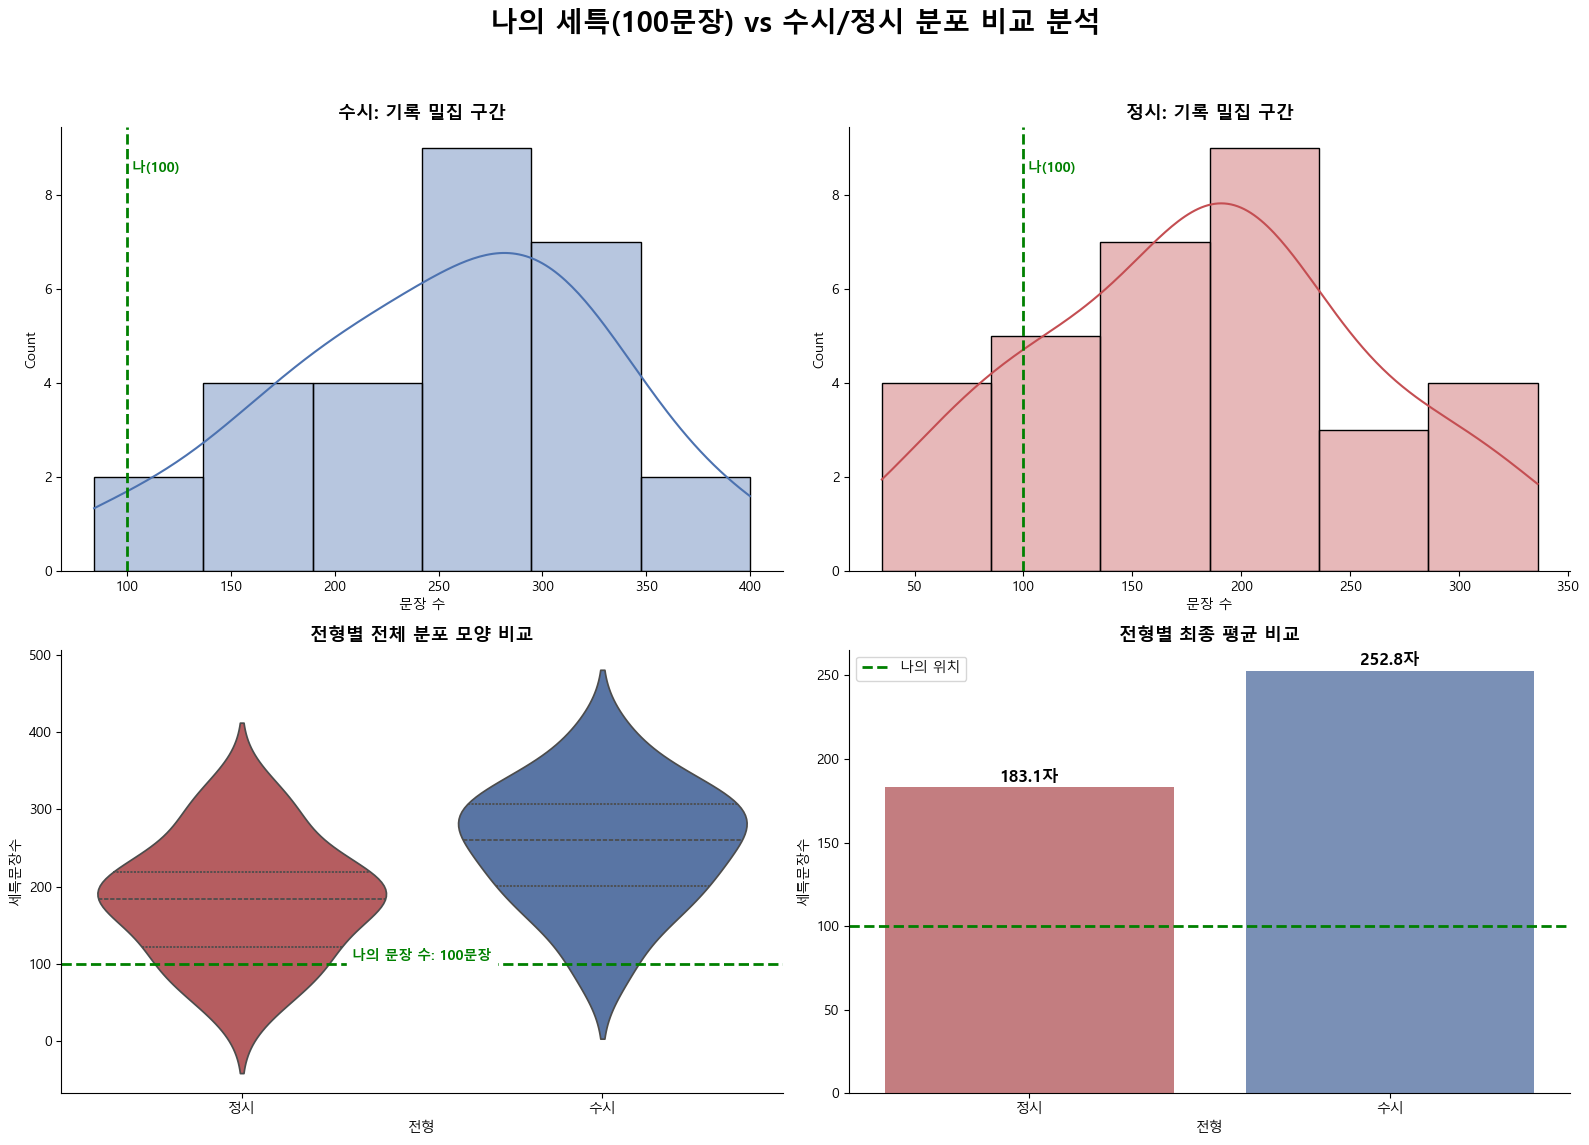

In [118]:


# 2. 데이터 불러오기 및 전처리
file_name = '세특문장수_수시정시_구분.xlsx' 

try:
    df = pd.read_excel(file_name)
    df.columns = df.columns.str.strip()
    
    # 필터링 및 변환
    df = df[df['전형'].isin(['수시', '정시'])]
    df['세특문장수'] = pd.to_numeric(df['세특문장수'], errors='coerce')
    df = df.dropna(subset=['세특문장수'])

except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다. '{file_name}'이 있는지 확인해주세요.")
    # 테스트용 더미 데이터 생성 (파일 없을 때 실행 되도록)
    data = {'전형': ['수시']*50 + ['정시']*50, 
            '세특문장수': np.concatenate([np.random.normal(60, 10, 50), np.random.normal(30, 10, 50)])}
    df = pd.DataFrame(data)


# 3. 그래프 그리기 (2행 2열)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
colors = {"수시": "#4C72B0", "정시": "#C44E52"}

# --- [1] 수시 전형 분포 (히스토그램) ---
sns.histplot(df[df['전형']=='수시']['세특문장수'], kde=True, ax=axes[0,0], color=colors['수시'], alpha=0.4)
axes[0,0].set_title('수시: 기록 밀집 구간', fontsize=13, fontweight='bold')
axes[0,0].set_xlabel('문장 수')
# 내 위치 표시
axes[0,0].axvline(my_lines, color='green', linestyle='--', linewidth=2, label='나의 위치')
axes[0,0].text(my_lines, axes[0,0].get_ylim()[1]*0.9, f' 나({my_lines})', color='green', fontweight='bold', ha='left')

# --- [2] 정시 전형 분포 (히스토그램) ---
sns.histplot(df[df['전형']=='정시']['세특문장수'], kde=True, ax=axes[0,1], color=colors['정시'], alpha=0.4)
axes[0,1].set_title('정시: 기록 밀집 구간', fontsize=13, fontweight='bold')
axes[0,1].set_xlabel('문장 수')
# [NEW] 내 위치 표시
axes[0,1].axvline(my_lines, color='green', linestyle='--', linewidth=2, label='나의 위치')
axes[0,1].text(my_lines, axes[0,1].get_ylim()[1]*0.9, f' 나({my_lines})', color='green', fontweight='bold', ha='left')

# --- [3] 전형별 경향성 비교 (바이올린 플롯) ---
sns.violinplot(x='전형', y='세특문장수', data=df, ax=axes[1,0], hue='전형', palette=colors, legend=False, inner='quartile')
axes[1,0].set_title('전형별 전체 분포 모양 비교', fontsize=13, fontweight='bold')
# [NEW] 내 위치 표시 (가로선)
axes[1,0].axhline(my_lines, color='green', linestyle='--', linewidth=2)
axes[1,0].text(0.5, my_lines + 1, f'나의 문장 수: {my_lines}문장', color='green', fontweight='bold', ha='center', va='bottom', backgroundcolor='white')

# --- [4] 평균값 차이 분석 (바 플롯) ---
sns.barplot(x='전형', y='세특문장수', data=df, ax=axes[1,1], hue='전형', palette=colors, legend=False, errorbar=None, alpha=0.8)
axes[1,1].set_title('전형별 최종 평균 비교', fontsize=13, fontweight='bold')

# 평균 수치 표시
means = df.groupby('전형', sort=False)['세특문장수'].mean()
for i, m in enumerate(means):
    axes[1,1].text(i, m + 1, f'{m:.1f}자', 
                   ha='center', va='bottom', fontweight='bold', fontsize=12)

# 내 위치 표시 (가로선으로 비교)
axes[1,1].axhline(my_lines, color='green', linestyle='--', linewidth=2, label='나의 위치')
# 범례 추가 (마지막 그래프에만)
axes[1,1].legend(loc='upper left')

# 전체 레이아웃 정리
plt.suptitle(f'나의 세특({my_lines}문장) vs 수시/정시 분포 비교 분석', fontsize=20, fontweight='bold', y=0.98)
sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()